# **E-Commerce Customer Churn Prediction**

![header](https://raw.githubusercontent.com/delabrilliano/Ecommerce_Churn_Prediction/main/image/ecommerce.png)

Created by: _**Delabriliano Ismail**_

<hr>

## **Business Problem Understanding**

### **Introduction**

Many of the early-stage e-commerce business focuses on "Customer Acquisition", which is the act of gaining new customers.

Acquisition is particularly important for early-stage e-commerce looking to grow their customer base.  But it’s not a sustainable way to grow the company revenue in the long term.

In order to be sustainable in the long-term, an e-commerce business must also focus on customer retention. Knowing when a customer will churn, can help a company in general to retain their customer better for a long-term profit.

Fundamentally, churn occurs when a customer stops consuming from a company. A high churn rate equals to a low retention rate.  Churn affects the size of a company customer base and has a big impact on the company's customer lifetime value.

### **Problem Statement**

Maintaining a churn-rate is crucial for an e-commerce business long-term profit. However, not all company have a system that can detect which of their customer that will churn. This situation can have a bad consequences for the company, when they give a benefit/promotion to a non-churning consumer and let the other customer churned. In this case, the company will compound an expense and lost a potential revenue from the churned consumer. Or, if a company want to play safe, they can give the benefit/promotion for all of their customer base. However, it will require a quite large of expenditure without any certainty that the benefit was given to the right target. 

### **Goals**

Based on the introduction and the problem statement, the aims for this project is to develop a machine learning model that can classify on which customer of a company in general and e-commerce company specifically, that will churn on not churn.

By having a system that can classify which customer will churn, an e-commerce company can give a benefit/promotion with a clearer target, and this will reduce their expense compared to when a company give the benefit/promotion to all of their customer base. And this will also have an impact on the company's customer retention rate, and in return, the company will have a more sustainable revenue in the future.

In short, this project is aims to develop a machine learning model, that can be used by marketing/sales/any department related to benefit/promotion, that can classify which customer will churn and not churn, that can help a company to maintain their customer retention rate to generate more sustainable revenue.

### **Metrics**

- Class 0 = Non-Churn (Negative)
- Class 1 = Churn (Positive) 

_Type 1 error: False Positive_

This error will increase the company expense by giving benefit and promotion to the non-churn customer and ignore the churning customer.

_Type 2 Error: False Negative_

This error will make a company to overlook their churning customer without giving them any benefit/promotion to maintain their retention.

Based on the consequences, we will be focusing on both errors type. We want to make sure that the model can detect a churning customer as many as possible and ensure that the company give the benefit and promotion to the right customer (churned customer). We also have to notes that the data is imbalance (which will be shown later in the EDA). So the metrics that we will use is **F1 Score**.

Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric. At the same time, the F1 score has been designed to work well on imbalanced data. [(Source)](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)

**F1 Score Formula**

\begin{equation}
F1 Score (+) = 2 *  \frac{Recall (+) * Precision (+)}{Recall (+) + Precision (+)}
\end{equation}

### **Analytics Approach**

Based on the Problem statement and goals, we will be conducting the _**Prescriptive Analytics**_ where we will predict which customer will churn, make a decision based on the prediction (giving benefit and promotion), and analyze how these decision impact the business.

## **Data Understanding**

**Notes:**

The dataset was given and the features are already pre-selected by _Purwadhika Digital Technology School_ as part of the exams for the Data Science and Machine Learning bootcamp programs.

### **Column Description**

| Attribute | Description |
| --- | --- |
| Tenure | Tenure of customer in organization |
| WarehouseToHome | Distance in between warehouse to home of customer |
| NumberOfDeviceRegistered | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Preferred order category of customer in last month |
| SatisfactionScore | Satisfactory score of customer on service |
| MaritalStatus | Marital status of customer |
| NumberOfAddress | Total number of address added on particular customer |
| Complain | Any complaint has been raised in last month |
| DaySinceLastOrder | Day Since last order by customer |
| CashbackAmount | Average cashback in last month |
| Churn | Indicate the if the customer churned (1) or not (0) |

[(Source)](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

In [316]:
## Importing Packages

### Common Package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Package for Correlation Analysis

from dython.nominal import correlation_ratio

## package for Model building and selection

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

## import model package

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Packages for resampling and imbalance Pipeline

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [317]:
## Import csv

df = pd.read_csv('data_ecommerce_customer_churn.csv')

## **Quick EDA**

In [318]:
## Display top 5 and bottom 5 data

display(df.head(), df.tail())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [319]:
## Display descriptive statistics

df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


We can see from the displayed dataframe and descriptive statistics that the dataset contains 10 features (8 Numerical, 2 Categorical) and 1 target (Churn columns). We also can see from the count that the count does not match on every columns, which mean that the dataset contains several missing value which we will need to handle later.  

In [320]:
## Check the balance of the dataset

df['Churn'].value_counts()

0    3267
1     674
Name: Churn, dtype: int64

In [321]:
## Create a cross tabulation dataframe for counting classes

(pd.crosstab(df['Churn'], columns='Count of Class', normalize=True)*100).round(2)

col_0,Count of Class
Churn,
0,82.9
1,17.1


We can see that we got an imbalance dataset (which is expected). The dataset contains 82.9% of majority class (non-churn customer) and 17.1% of minority class (churned customers)

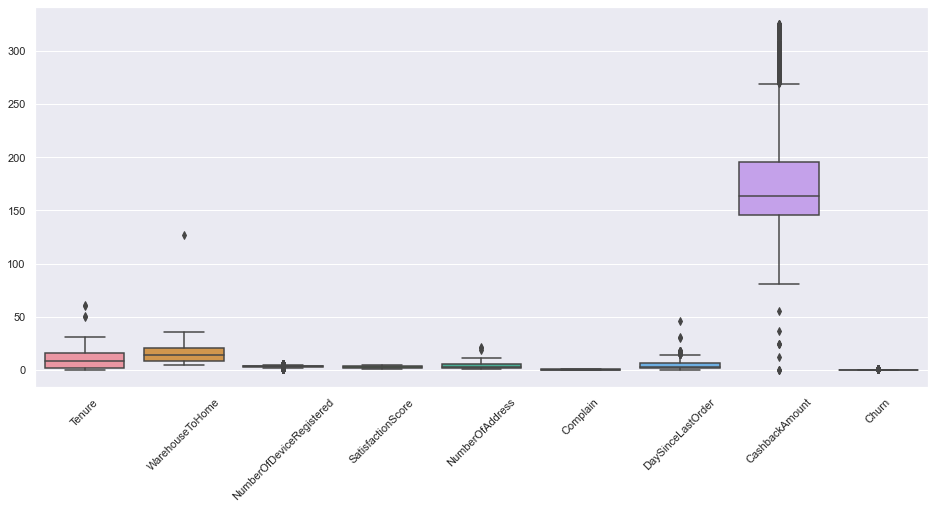

In [322]:
## Check outlier with boxplot visualization

sns.set(style='darkgrid', palette='viridis')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We can see from the boxplot that the 'CashbackAmount' columns contain the most outlier. And for the other columns, there are a few outliers.

For the outliers, we will not handle it now, instead, we will handle the outlier after we find the best base model.

In [323]:
## Check duplicate

df.duplicated().sum()

671

We can see above that there are 671 duplicated rows exist in the dataset. However, we will not drop the duplicates due to the information limitation we have about the dataset. Because the data does not contain any unique id that shown for each row (e.g customerID), we cannot confirm if the rows are really a duplicate or just a different customer that have identical values on each columns. 

In [324]:
## Check datatypes and missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


From the information above, we can see that there are several columns that contains a missing value.

Let's count how many missing value exist in each column.

In [325]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Now we can see that there are 3 columns that contain a missing value.

In [326]:
## Displaying features, datatype, count of null, null percentage, total unique value, and unique sample

ecomDesc = []
for i in df.columns:
    ecomDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len (df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(ecomDesc,
columns = [
    'Features',
    'DataType',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Features,DataType,Null,Null Percentage,Unique,Unique Sample
0,Tenure,float64,194,4.92,36,"[0.0, 17.0]"
1,WarehouseToHome,float64,169,4.29,33,"[nan, 17.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0,0.00,5,"[4, 1]"
5,MaritalStatus,object,0,0.00,3,"[Married, Single]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 21]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[46.0, 13.0]"
9,CashbackAmount,float64,0,0.00,2335,"[121.07, 209.74]"


The missing value exist around 5 percent on each 3 columns. Let's now handle the missing value on each of these columsn.

## **Handling Missing Value**

In [327]:
## Create a copy of the dataframe

df_1 = df.copy()

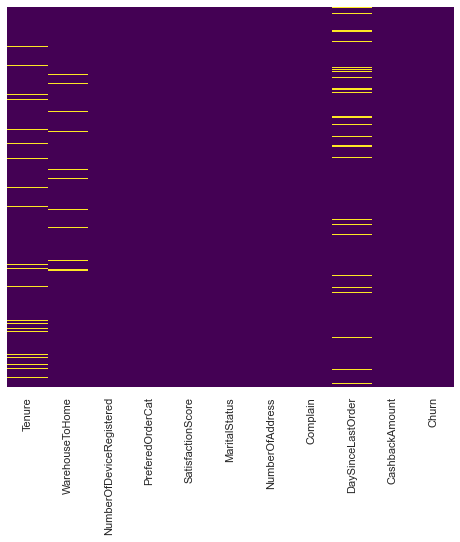

In [328]:
## Visualization of the missing value

plt.figure(figsize=(8, 7))
sns.heatmap(df_1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

From the visualization, We can't notice any pattern for the missing value. Thus, we will handle the missing value for each column seperately.

**Tenure**

Let's first check if there are any high correlation exist between the 'Tenure' feature with other features. If there is a high correlation with other feature, we will be using those features to help impute the missing value on 'Tenure' features.

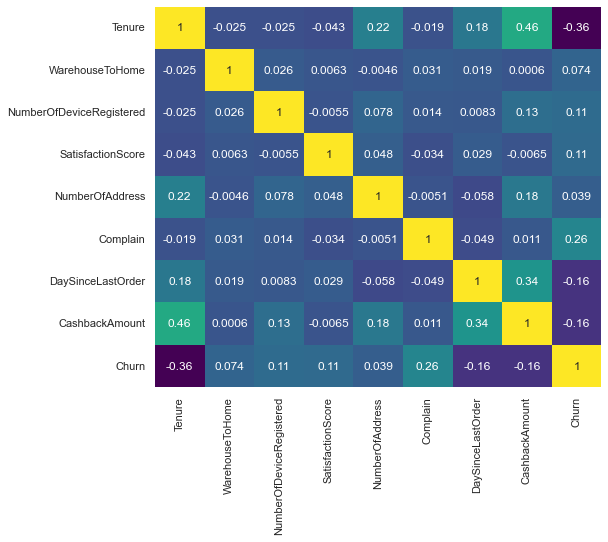

In [329]:
## Checking correlation with numerical features

plt.figure(figsize=(8, 7))
sns.heatmap(df_1.corr(), cmap='viridis', cbar=False, annot=True)
plt.show()

From the heatmap we can see that the 'Tenure' features have the highest correlation with 'CashbackAmount' features. Let's now check the 'Tenure' correlation with categorical features.

In [330]:
## create df for categorical features

col = df_1.columns[df.dtypes == 'object']

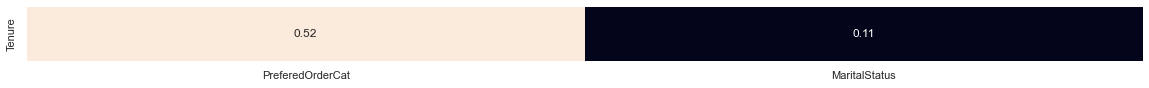

In [331]:
## Calculating and visualizing the correlation ratio between 'Tenure' feature with categorical features

cor_ratio = []

for i in df_1.columns[df_1.dtypes == 'object']:
    corr = round(correlation_ratio(df_1[i], df_1['Tenure']), 2)
    cor_ratio.append(corr)

df_cr_ratio = pd.DataFrame(data= [cor_ratio], columns=col, index=['Tenure'])

plt.figure(figsize=(20,1))
sns.heatmap(df_cr_ratio, annot=True, cbar=False)
plt.show()

We can see that the 'Tenure' features have a the highest overall correlation with 'PreferedOrderCat' features. So we will use both 'CashbackAmount' and 'PreferedOrderCat' features to impute the missing value on 'Tenure' features. 

In [332]:
## Slicing the df where Tenure is null and CashbackAmount & PreferedOrderCat is not null.

df_1[['Tenure', 'CashbackAmount', 'PreferedOrderCat']][(df_1['Tenure'].isna() == True) & (df_1['CashbackAmount'].isna() == False) & (df_1['PreferedOrderCat'].isna() == False)]

,Tenure,CashbackAmount,PreferedOrderCat
16,NaN,121.68,Mobile
37,NaN,122.18,Mobile
44,NaN,120.08,Mobile
85,NaN,122.70,Mobile
93,NaN,120.75,Mobile
...,...,...,...
3842,NaN,122.59,Mobile
3853,NaN,116.75,Mobile Phone
3879,NaN,122.97,Mobile
3890,NaN,114.20,Mobile Phone


We can't notice any pattern between the missing value with the other columns. Let's further check on what 'PreferedOrderCat' category does the Tenure missing.

In [333]:
## Checking order category that contains null value on Tenure

df_1[df_1['Tenure'].isna() == True]['PreferedOrderCat'].unique()

array(['Mobile', 'Laptop & Accessory', 'Mobile Phone'], dtype=object)

The missing value on 'Tenure' features occurs on Mobile, Laptop & Accessory, and Mobile Phone Prefered order category. Now we will try to find the value to imputre the missing value on Tenure features with these categories and with Cashback Amount.

### Prefered Ordet Category: **Mobile**

In [334]:
## create df for mobile category on PreferedOrderCat

df_mobile = df_1[df_1['PreferedOrderCat'] == 'Mobile']

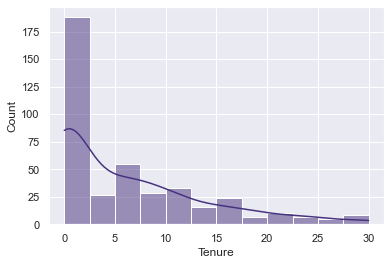

In [335]:
## check distribution of Tenure on Mobile PreferedOrderCat

sns.histplot(df_mobile['Tenure'], kde=True)
plt.show()

We can see that from the plot, the 'Tenure' data on prefered Order Category on _mobile_ is positvely skewed. So later we will use the median to impute the missing value.

In [336]:
## find the average value of CashbackAmount on mobile category

mobile_cashback = df_mobile['CashbackAmount'].median()
print(f'The average cashback amount is: {mobile_cashback}')

The average cashback amount is: 125.64


In [337]:
## find the median value of Tenure on below average cashback

mobile_fill_1 = df_mobile[df_mobile['CashbackAmount'] < mobile_cashback]['Tenure'].median()
print(f'The median value for prefered order category on Mobile and below average cashback amount is: {mobile_fill_1} year Tenure')

The median value for prefered order category on Mobile and below average cashback amount is: 2.0 year Tenure


In [338]:
## find the median value of Tenure on above average cashback

mobile_fill_2 = df_mobile[df_mobile['CashbackAmount'] > mobile_cashback]['Tenure'].median()
print(f'The median value for prefered order category on Mobile and above average cashback amount is: {mobile_fill_2} year Tenure')

The median value for prefered order category on Mobile and above average cashback amount is: 4.0 year Tenure


From the analysis above, we can see that the tenure with below average cashback have the median value of **3 year** and **4 year** for the above average. Now we will impute the null value on 'Tenure' features that have prefered order category on _mobile_ with both of these median value.

In [339]:
## Check total missing value on Tenure with 'Mobile' Order Category

df_1[df_1['PreferedOrderCat'] == 'Mobile']['Tenure'].isna().sum()

151

In [340]:
## Check total missing value on Tenure in general

df_1['Tenure'].isna().sum()

194

In [341]:
## Create mask for Mobile order cateogry with below and above average

mask_mobile_1 = (df_1['PreferedOrderCat'] == 'Mobile') & (df_1['CashbackAmount'] < mobile_cashback)

mask_mobile_2 = (df_1['PreferedOrderCat'] == 'Mobile') & (df_1['CashbackAmount'] > mobile_cashback)

In [342]:
## filling the missing value

df_1.loc[mask_mobile_1, 'Tenure'] = df_1.loc[mask_mobile_1, 'Tenure'].fillna(mobile_fill_1)

df_1.loc[mask_mobile_2, 'Tenure'] = df_1.loc[mask_mobile_2, 'Tenure'].fillna(mobile_fill_2)

In [343]:
## Check remaining number of missing value on Tenure in general

df_1['Tenure'].isna().sum()

43

We can see that the number of missing value has been reduced from 194 to 43.

### Prefered Ordet Category: **Laptop & Accessory**

In [344]:
## create df for Laptop & Accessory category on PreferedOrderCat

df_laptop = df_1[(df_1['PreferedOrderCat'] == 'Laptop & Accessory')]

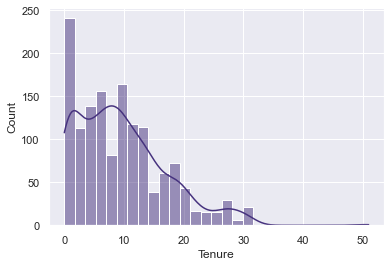

In [345]:
## check distribution of Tenure on Laptop & Accessory PreferedOrderCat

sns.histplot(df_laptop['Tenure'], kde=True)
plt.show()

We can see that from the plot, the 'Tenure' data on prefered Order Category on _laptop & Accessory_ is positvely skewed. So later we will use the median to impute the missing value.

In [346]:
## find the average value of CashbackAmount on Laptop & Accessory category

laptop_cashback = df_laptop['CashbackAmount'].mean()
print(f'The average cashback amount is: {laptop_cashback}')

The average cashback amount is: 167.17026748971193


In [347]:
## find the median value of Tenure on below average cashback

laptop_fill_1 = df_laptop[df_laptop['CashbackAmount'] < laptop_cashback]['Tenure'].median()
print(f'The median value for prefered order category on laptop & accessory and below average cashback amount is: {laptop_fill_1} year Tenure')

The median value for prefered order category on laptop & accessory and below average cashback amount is: 8.0 year Tenure


In [348]:
## find the median value of Tenure on above average cashback

laptop_fill_2 = df_laptop[df_laptop['CashbackAmount'] > laptop_cashback]['Tenure'].median()
print(f'The median value for prefered order category on laptop & accessory and above average cashback amount is: {laptop_fill_2} year Tenure')

The median value for prefered order category on laptop & accessory and above average cashback amount is: 9.0 year Tenure


From the analysis above, we can see that the tenure with below average cashback amount have the median value of **8 year** and **9 year** for the above average. Later we will impute the null value on 'Tenure' features that have prefered order category on _Laptop & Accessory_ with both of these median value.

In [349]:
## Check total missing value on Tenure with 'Laptop & Accessory' Order Category

df_1[df_1['PreferedOrderCat'] == 'Laptop & Accessory']['Tenure'].isna().sum()

8

In [350]:
## Check total missing value on Tenure in general

df_1['Tenure'].isna().sum()

43

In [351]:
## Create mask for Laptop & Accessory order cateogry with below and above average cashback

mask_laptop_1 = (df_1['PreferedOrderCat'] == 'Laptop & Accessory') & (df_1['CashbackAmount'] < laptop_cashback)

mask_laptop_2 = (df_1['PreferedOrderCat'] == 'Laptop & Accessory') & (df_1['CashbackAmount'] > laptop_cashback)

In [352]:
## filling the missing value

df_1.loc[mask_laptop_1, 'Tenure'] = df_1.loc[mask_laptop_1, 'Tenure'].fillna(laptop_fill_1)

df_1.loc[mask_laptop_2, 'Tenure'] = df_1.loc[mask_laptop_2, 'Tenure'].fillna(laptop_fill_2)

In [353]:
## Check remaining number of missing value on Tenure in Laptop and Accessory

df_1[df_1['PreferedOrderCat'] == 'Laptop & Accessory']['Tenure'].isna().sum()

0

We can see that the missing value has been filled on laptop & accesory prefered order category. Lets proceed to fill the missing value on Mobile Phone category.

### Prefered Order Category: **Mobile Phone**

In [354]:
## create df for Mobile Phone category on PreferedOrderCat

df_phone = df_1[(df_1['PreferedOrderCat'] == 'Mobile Phone')]

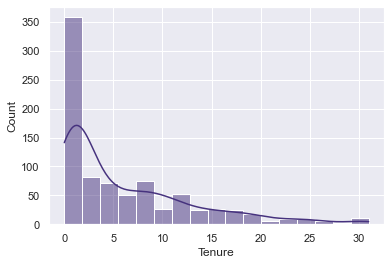

In [355]:
## check distribution of Tenure on Mobile Phone PreferedOrderCat

sns.histplot(df_phone['Tenure'], kde=True)
plt.show()

We can see that from the plot, the 'Tenure' data on prefered Order Category on _Mobile Phone_ is positvely skewed. So later we will use the median to impute the missing value.

In [356]:
## find the average value of CashbackAmount on Mobile Phone category

phone_cashback = df_phone['CashbackAmount'].mean()
print(f'The average cashback amount is: {phone_cashback}')

The average cashback amount is: 148.46444193912063


In [357]:
## find the median value of Tenure on below average cashback

phone_fill_1 = df_phone[df_phone['CashbackAmount'] < phone_cashback]['Tenure'].median()
print(f'The median value for prefered order category on mobile phone and below average cashback amount is: {phone_fill_1} year Tenure')

The median value for prefered order category on mobile phone and below average cashback amount is: 2.0 year Tenure


In [358]:
## find the median value of Tenure on above average cashback

phone_fill_2 = df_phone[df_phone['CashbackAmount'] > phone_cashback]['Tenure'].median()
print(f'The median value for prefered order category on mobile phone and above average cashback amount is: {phone_fill_2} year Tenure')

The median value for prefered order category on mobile phone and above average cashback amount is: 4.0 year Tenure


From the analysis above, we can see that the tenure with below average cashback amount have the median value of **2 year** and **4 year** for the above average. Later we will impute the null value on 'Tenure' features that have prefered order category on _Mobile Phone_ with both of these median value.

In [359]:
## Checking total missing value with Mobile Phone order category

df_1[df_1['PreferedOrderCat'] == 'Mobile Phone']['Tenure'].isna().sum()

35

In [360]:
## Check total missing value on Tenure in general

df_1['Tenure'].isna().sum()

35

We can see that now the amount of total missing value = amount of missing value in Tenure Mobile phone prefered order category. This means that if we fill the missing value correctly, the remaining missing value should be 0.

In [361]:
## Create mask for Mobile Phone order cateogry with below and above average cashback

mask_phone_1 = (df_1['PreferedOrderCat'] == 'Mobile Phone') & (df_1['CashbackAmount'] < phone_cashback)

mask_phone_2 = (df_1['PreferedOrderCat'] == 'Mobile Phone') & (df_1['CashbackAmount'] > phone_cashback)

In [362]:
## filling the missing value

df_1.loc[mask_phone_1, 'Tenure'] = df_1.loc[mask_phone_1, 'Tenure'].fillna(phone_fill_1)

df_1.loc[mask_phone_2, 'Tenure'] = df_1.loc[mask_phone_2, 'Tenure'].fillna(phone_fill_2)

In [363]:
## Check remaining number of missing value on Tenure in Mobile Phone

df_1[df_1['PreferedOrderCat'] == 'Mobile Phone']['Tenure'].isna().sum()

0

In [364]:
## Check remaining missing value on Tenure in General

df_1['Tenure'].isna().sum()

0

Now all of the missing value in 'Tenure' columns is filled. Let's proceed to fill the missing value on 'WarehouseToHome' columns.

**WarehouseToHome**

First thing first, let's recheck the heatmap for the null value to find if there's a pattern between the remaining missing value.

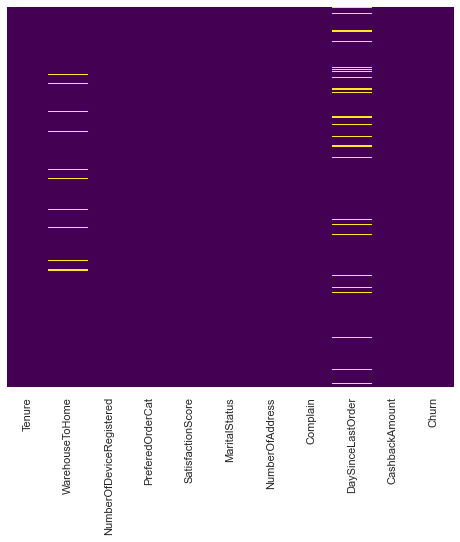

In [365]:
## Visualization of the missing value

plt.figure(figsize=(8, 7))
sns.heatmap(df_1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

From the heatmap, we can't recognize any particular pattern visible on the remaining missing value. Thus, we will investigate further by checking the correlation between 'WarehouseToHome' features to other features. If there are any features with a high correlation exist, we will impute the missing value on 'WarehouseToHome' features with the correlated feature(s).

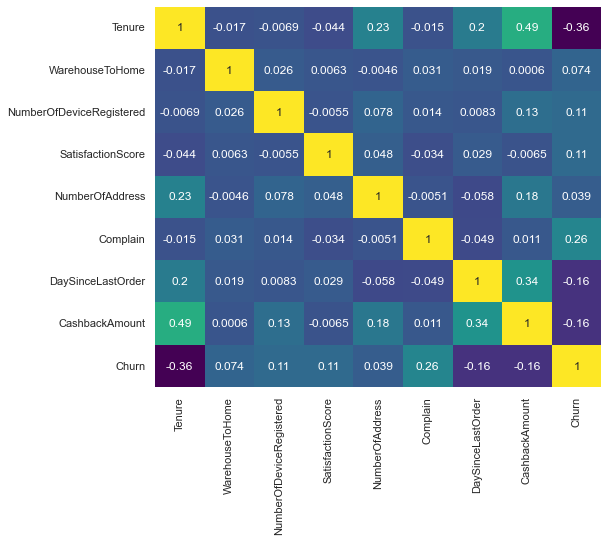

In [366]:
## Checking correlation with numerical features

plt.figure(figsize=(8, 7))
sns.heatmap(df_1.corr(), cmap='viridis', cbar=False, annot=True)
plt.show()

From the correlation with numerical features, we can't see any strong correlation that exist between 'WarehouseToHome' features with the other features. Let's check the correlation with the categorical features.

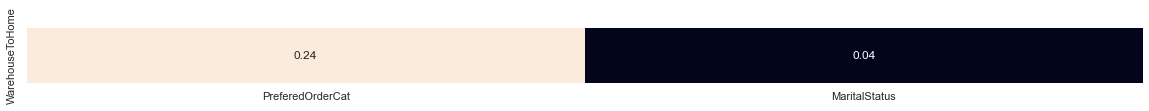

In [367]:
## Calculating and visualizing the correlation ratio between 'WarehouseToHome' feature with categorical features

cor_ratio = []

for i in df.columns[df.dtypes == 'object']:
    corr = round(correlation_ratio(df[i], df['WarehouseToHome']), 2)
    cor_ratio.append(corr)

df_cr_ratio = pd.DataFrame(data= [cor_ratio], columns=col, index=['WarehouseToHome'])

plt.figure(figsize=(20,1))
sns.heatmap(df_cr_ratio, annot=True, cbar=False)
plt.show()

With the categorical features, we also can't see any strong correlation exist between the features. Thus, for the 'WarehouseToHome' missing value, we will be using the simple imputer for filling the missing value, with mean/median/mode.

In [368]:
## Check datatypes and display unique value list

print(format('The datatypes is:'), (df_1['WarehouseToHome'].dtypes))
print(format('The unique values are:'), (df_1['WarehouseToHome'].unique()))


The datatypes is: float64
The unique values are: [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]


The 'WarehouseToHome' features datatype is float and from the unique value we can see that it is a continous number. Thus we will use either mean/median for filling the missing value.

Let's check the distribution to decide whether to use mean or median to filling the missing value.

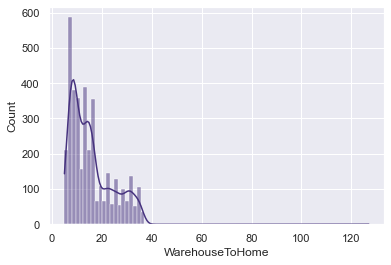

In [369]:
## Check distribution of WarehouseToHome

sns.histplot(df_1['WarehouseToHome'], kde=True)
plt.show()

From the histogram, we can see that the 'WarehouseToHome' value is not normally distributed with quite a few outlier. So to fill the missing value, we will not use mean, but rather we will use median value.

In [370]:
## find the median value of WarehouseToHome

warehouse_med = df_1['WarehouseToHome'].median()

print(f'The median for the WareHouseToHome features is: {warehouse_med}')

The median for the WareHouseToHome features is: 14.0


In [371]:
## Filling the missing value for the 'WarehouseToHome' features with its median value.

df_1['WarehouseToHome'].fillna(warehouse_med, inplace=True)

In [372]:
## Check number of missing value

df_1['WarehouseToHome'].isna().sum()

0

We can see that there are no more missing value exist in the column. Let's proceed to handling the missing value for the last column.

**DaySinceLastOrder**

Same with before, let's check if the 'DaySinceLastOrder' features have any high correlation with other features for us to impute with.

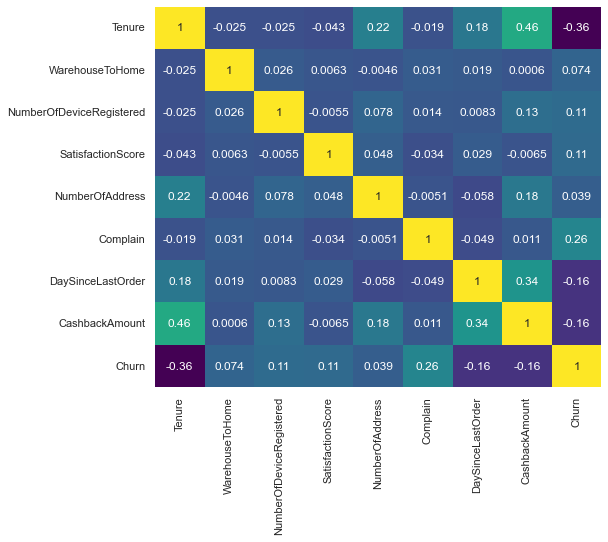

In [373]:
## Checking correlation with numerical features

plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), cmap='viridis', cbar=False, annot=True)
plt.show()

We can see there are no high correlation exist with the numerical features, with 'CashbackAmount' being the highest correlated features with 'DaySinceLastOrder' but it is still not close to 0.5 correlation value.

Let's check the correlation with the categorical features.

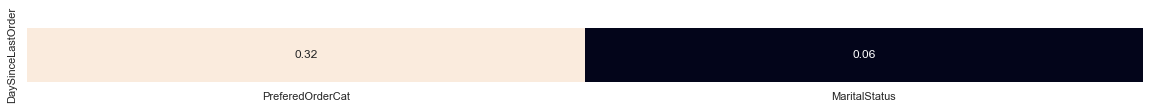

In [374]:
## Calculating and visualizing the correlation ratio between 'DaySinceLastOrder' feature with categorical features

cor_ratio = []

for i in df.columns[df.dtypes == 'object']:
    corr = round(correlation_ratio(df[i], df['DaySinceLastOrder']), 2)
    cor_ratio.append(corr)

df_cr_ratio = pd.DataFrame(data= [cor_ratio], columns=col, index=['DaySinceLastOrder'])

plt.figure(figsize=(20,1))
sns.heatmap(df_cr_ratio, annot=True, cbar=False)
plt.show()

We can also see that there are no strong correlation exist with the categorical features. Thus, we will impute the missing value using mean/median/mode.

In [375]:
## Check datatypes and display unique value list

print(format('The datatypes is:'), (df_1['DaySinceLastOrder'].dtypes))
print(format('The unique values are:'), (df_1['DaySinceLastOrder'].unique()))

The datatypes is: float64
The unique values are: [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]


Eventhough we can see that the datatype and unique value are similar with continous variable, from the data we can see that the columns does not contain any decimal number. So we will treat this column as discrete numbers and use mode to fill the missing value.

In [376]:
## Find mode value of DaySinceLastOrder

order_mode = df_1['DaySinceLastOrder'].mode()[0]

print(f'The mode for the DaySinceLastOrder features is: {order_mode}')

The mode for the DaySinceLastOrder features is: 3.0


In [377]:
## Fill the missing value with mode

df_1['DaySinceLastOrder'].fillna(order_mode, inplace=True)

In [378]:
## Checking missing value

df_1['DaySinceLastOrder'].isnull().sum()

0

In [379]:
## Check if there are anymore missing value exist in the dataframe

df_1.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

We can see that there are no more missing values in the dataset. Now let's check how our dataset looks like after we handled the missing value

In [380]:
## Check the final descriptive statistics for the dataset

display(df_1.describe(), df_1.describe(include='O'), df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3941 non-null   float64
 1   WarehouseToHome           3941 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3941 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,9.695762,15.579802,3.679269,3.088302,4.237757,0.282416,4.448871,176.707419,0.171023
std,8.462701,8.275800,1.013938,1.381832,2.626699,0.450232,3.583909,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,8.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


None

If we fill the missing value correctly, the descriptive statistics of 'Tenure', 'WarehouseToHome', and 'DaySinceLastOrder' columns should not change significantly.

we can see that the 'Tenure', 'WarehouseToHome', and 'DaySinceLastOrder' columns descriptive statistics has change slightly on the mean, standard deviation, and it's quartiles as we expect, and no major changes in the descriptive statistics.

Let's now proceed to feature selection steps.

## **Feature Selection**

For our feature selection process, we will use the spearman correlation to choose which features we will be selecting. We will drop the features with low correlation with target, and drop features that have a really high correlation with the target. 

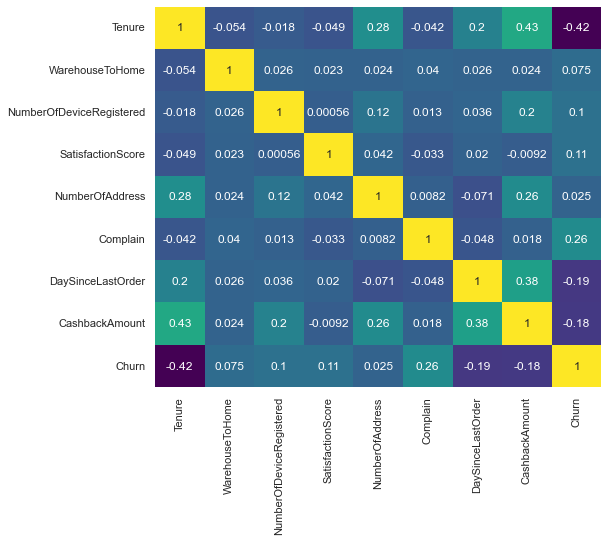

In [381]:
## Checking correlation with numerical features

plt.figure(figsize=(8, 7))
sns.heatmap(df.corr('spearman'), cmap='viridis', cbar=False, annot=True)
plt.show()

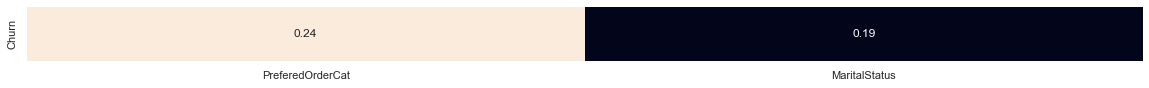

In [382]:
## Calculating and visualizing the correlation ratio between target and categorical features

cor_ratio = []

for i in df.columns[df.dtypes == 'object']:
    corr = round(correlation_ratio(df[i], df['Churn']), 2)
    cor_ratio.append(corr)

df_cr_ratio = pd.DataFrame(data= [cor_ratio], columns=col, index=['Churn'])

plt.figure(figsize=(20,1))
sns.heatmap(df_cr_ratio, annot=True, cbar=False)
plt.show()

From the heatmap, we can see that 'Tenure' feature have the highest correlation (-0.42) with the target and 'WarehouseToHome' have the lowest correlation (0.075). However, we will not drop any features due to the features are already pre-selected from the source. And to avoid an underfit model, we will be using all the features that are available.

Let's now proceed to develop our pipeline for our model.

## **Pipeline Preprocessing**

**Splitting Dataset**

In [383]:
X = df_1.drop(columns='Churn') ## X variables (features)
y = df_1['Churn'] ## Target/Labels

In [384]:
## Split X and Y variable into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .20, random_state=666)

**Features Encoding**

- PreferedOrderCat: We will encode the `PreferedOrderCat` features with One Hot Encoding (OHE) because the features does not have an order and only have 6 unique values.  
- MaritalStatus > We will also encode the `MaritalStatus` features with One Hot Encoding (OHE) because the features also does not have an order and only have 3 unique values.

In [385]:
## Create categorical column list

cat_columns = ['PreferedOrderCat', 'MaritalStatus'] ## Create List for categorical features

In [386]:
## Create pipeline for encoding categorical features

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

In [387]:
## Create pipeline for transforming the categorical features with encoding pipeline

preprocessor = ColumnTransformer([
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

## **Base Modelling & Model Evaluation**

In [388]:
## Define algorithm that will be use

model_LogReg = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_XGB = XGBClassifier()

### **Model Benchmarking**

In [389]:
## Create pipeline for each algorithm

PipeLine_LogReg = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_LogReg)
]) 

PipeLine_KNN = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_KNN)
])    

PipeLine_DT = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_DT)
])    

PipeLine_RF = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_RF)
])    

PipeLine_XGB = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_XGB)
])

In [390]:
## Create def for cross validation

def Cross_Val(pipe, X, y, Nama):
    kf = KFold(n_splits=5)
    cv_acc = cross_val_score(pipe, X, y, cv = kf, scoring='accuracy')
    cv_prec = cross_val_score(pipe, X, y, cv = kf, scoring='precision')
    cv_rec = cross_val_score(pipe, X, y, cv = kf, scoring='recall')
    cv_f1 = cross_val_score(pipe, X, y, cv = kf, scoring='f1')
    data = {
        Nama + " CV (Mean)" : [cv_acc.mean(), cv_prec.mean(), cv_rec.mean(), cv_f1.mean()]
    }
    df = pd.DataFrame(data, index = ["Accuracy", "Precision", "Recall", "F1"])
    return df

In [391]:
## Training Data

In [392]:
## Cross validation for Logistic Regression algorithm with Training Data

cv_LogReg_tr = Cross_Val(PipeLine_LogReg, X_train, y_train, 'LogReg Training')
cv_LogReg_tr

,LogReg Training CV (Mean)
Accuracy,0.883565
Precision,0.733460
Recall,0.503352
F1,0.596202


In [393]:
## Cross validation for KNN algorithm with Training Data

cv_KNN_tr = Cross_Val(PipeLine_KNN, X_train, y_train, 'KNN Training')
cv_KNN_tr

,KNN Training CV (Mean)
Accuracy,0.851840
Precision,0.597490
Recall,0.404642
F1,0.482060


In [394]:
## Cross validation for Decision Tree algorithm with Training Data

cv_DT_tr = Cross_Val(PipeLine_DT, X_train, y_train, 'DT Training')
cv_DT_tr

,DT Training CV (Mean)
Accuracy,0.912431
Precision,0.746238
Recall,0.760452
F1,0.740057


In [395]:
## Cross validation for Random Forest algorithm with Training Data

cv_RF_tr = Cross_Val(PipeLine_RF, X_train, y_train, 'RF Training')
cv_RF_tr

,RF Training CV (Mean)
Accuracy,0.930832
Precision,0.861471
Recall,0.704442
F1,0.775573


In [396]:
## Cross validation for XGBoost algorithm with Training Data

cv_XGB_tr = Cross_Val(PipeLine_XGB, X_train, y_train, 'XGB Training')
cv_XGB_tr

,XGB Training CV (Mean)
Accuracy,0.936864
Precision,0.850840
Recall,0.769531
F1,0.807345


In [397]:
## Combining training cross validation result from each algorithm

pd.concat([cv_LogReg_tr, cv_KNN_tr, cv_DT_tr, cv_RF_tr, cv_XGB_tr], axis=1).T

,Accuracy,Precision,Recall,F1
LogReg Training CV (Mean),0.883565,0.733460,0.503352,0.596202
KNN Training CV (Mean),0.851840,0.597490,0.404642,0.482060
DT Training CV (Mean),0.912431,0.746238,0.760452,0.740057
RF Training CV (Mean),0.930832,0.861471,0.704442,0.775573
XGB Training CV (Mean),0.936864,0.850840,0.769531,0.807345


Based on the cross validation F1 Score on training dataset, the top three algorithms are XGBoost, Random Forest, and Decision Tree. Now let's check with the test dataset to see how the model will perform.

In [398]:
## Test Dataset

In [399]:
## Cross validation for Logistic Regression algorithm with Test Data

cv_LogReg_ts = Cross_Val(PipeLine_LogReg, X_test, y_test, 'LogReg Testing')
cv_LogReg_ts

,LogReg Testing CV (Mean)
Accuracy,0.877078
Precision,0.711267
Recall,0.487790
F1,0.574250


In [400]:
## Cross validation for KNN algorithm with Test Data

cv_KNN_ts = Cross_Val(PipeLine_KNN, X_test, y_test, 'KNN Testing')
cv_KNN_ts

,KNN Testing CV (Mean)
Accuracy,0.823857
Precision,0.472222
Recall,0.195366
F1,0.273810


In [401]:
## Cross validation for Decision Tree algorithm with Test Data

cv_DT_ts = Cross_Val(PipeLine_DT, X_test, y_test, 'DT Testing')
cv_DT_ts

,DT Testing CV (Mean)
Accuracy,0.859308
Precision,0.597312
Recall,0.576069
F1,0.564115


In [402]:
## Cross validation for Random Forest algorithm with Test Data

cv_RF_ts = Cross_Val(PipeLine_RF, X_test, y_test, 'RF Testing')
cv_RF_ts

,RF Testing CV (Mean)
Accuracy,0.879594
Precision,0.755455
Recall,0.484928
F1,0.580615


In [403]:
## Cross validation for XGBoost algorithm with Test Data

cv_XGB_ts = Cross_Val(PipeLine_XGB, X_test, y_test, 'XGB Testing')
cv_XGB_ts

,XGB Testing CV (Mean)
Accuracy,0.882117
Precision,0.684510
Recall,0.569486
F1,0.618490


In [404]:
## Combining testing cross validation result from each algorithm

pd.concat([cv_LogReg_ts, cv_KNN_ts, cv_DT_ts, cv_RF_ts, cv_XGB_ts], axis=1).loc[['F1']].T.sort_values('F1', ascending=False)

,F1
XGB Testing CV (Mean),0.618490
RF Testing CV (Mean),0.580615
LogReg Testing CV (Mean),0.574250
DT Testing CV (Mean),0.564115
KNN Testing CV (Mean),0.273810


For the test dataset we can see that the same 3 best performing models are XGboost, Random Forest, and Logistic Regression.

However, two out of three best algorithms is tree-based algorithm. And because the decision tree scoring is close to the logistic regression, we will choose decision tree instead.

Now we will use these 3 models with handled outliers and we will compare the scoring again before and after we handle the outliers.

### **Handling Outliers**

Let's display the boxplot for our dataset again

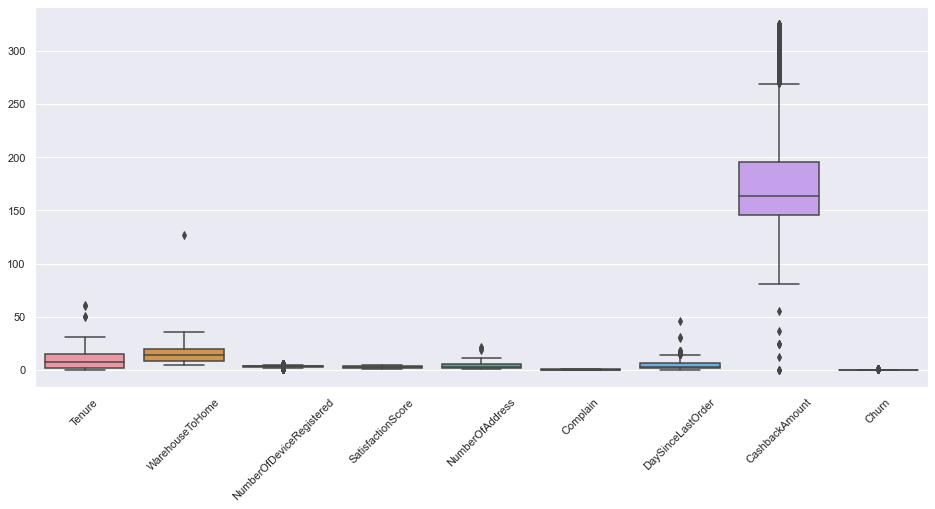

In [405]:
## Display boxplot

sns.set(style='darkgrid', palette='viridis')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df_1)
plt.xticks(rotation=45)
plt.show()

Next, we will be handing the outliers. We will not be dropping the outliers because we can see that the cashback amount contains many outlier, and the other reason we can't be sure that the outliers was due to measurement error, which in this case, the outliers is recommended to not be dropped [(Source)](https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/).

Instead, we will be capping the outliers. The outlier that got past the upper bound will be change to the upper bound value, and the outlier outside of the lower bound will be change to the lower bound value [(Source 2)](https://medium.com/analytics-vidhya/detect-and-handling-outliers-53723d8ec17a)

In [406]:
## create new df

df_2 = df_1.copy()

In [407]:
## Create list for all numerical columns

num_cols_2 = list(df_2.select_dtypes(exclude='object').columns)
num_cols_2.remove('Churn')
num_cols_2

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [408]:
## Removing outliers

for cols in num_cols_2:
    Q1 = df_2[cols].quantile(0.25) ## Find Q1
    Q3 = df_2[cols].quantile(0.75) ## Find Q3
    IQR=Q3-Q1 ##Interquartile range
    lb= Q1-(1.5 * IQR) ## find lower-bound
    ub= Q3+(1.5 * IQR) ## find upper-bound
    df_2[cols] = df_2[cols].mask(df_2[cols]<lb, lb) ## replace with lower bound
    df_2[cols] = df_2[cols].mask(df_2[cols]>ub, ub) ## replace with upper bound

Now let's check the boxplot again on our dataframe if there are anymore outliers.

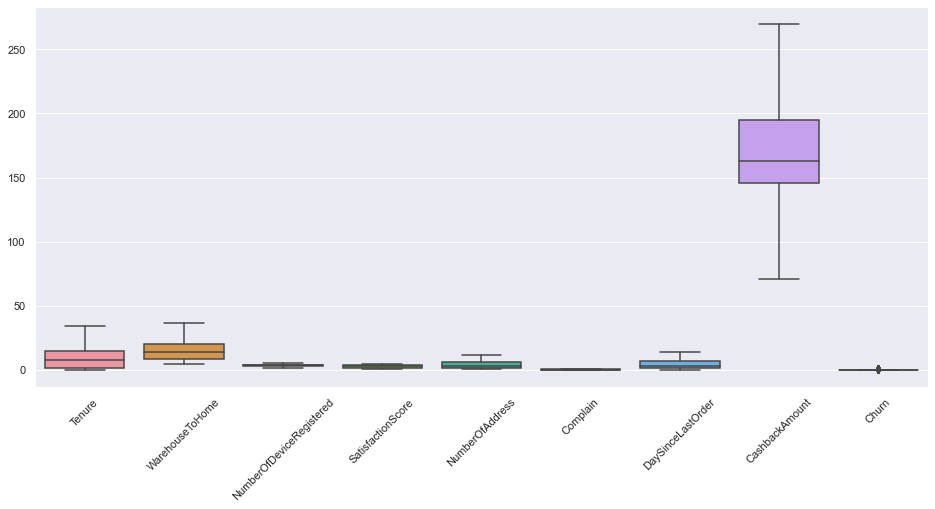

In [409]:
## Displaying boxplot after handling outlier

sns.set(style='darkgrid', palette='viridis')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df_2)
plt.xticks(rotation=45)
plt.show()

We can see that now there are no outliers exist in the dataframe. Let's proceed with our modeling.

In [410]:
## Splitting dataset without outlier

In [411]:
X_OL = df_2.drop(columns='Churn') ## X variables (features)
y_OL = df_2['Churn'] ## Target/Labels

In [412]:
## Splitting train and test data

X_train_OL, X_test_OL, y_train_OL, y_test_OL = train_test_split(X_OL, y_OL, stratify=y_OL, test_size = .20, random_state=666)

In [413]:
## Define algorithm

model_DT_OL = DecisionTreeClassifier()
model_RF_OL = RandomForestClassifier()
model_XGB_OL = XGBClassifier()

In [414]:
## Create pipeline for each algorithm

PipeLine_DT_OL = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_DT_OL)
])    

PipeLine_RF_OL = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_RF_OL)
])    

PipeLine_XGB_OL = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_XGB_OL)
])

In [415]:
## Cross validation on Training and Testing data with Decision Tree algorithm

cv_DT_OL_tr = Cross_Val(PipeLine_DT_OL, X_train_OL, y_train_OL, 'DT without Outlier Training') ## Training
cv_DT_OL_ts = Cross_Val(PipeLine_DT_OL, X_test_OL, y_test_OL, 'DT without Outlier Testing') ## Testing

In [416]:
## Combine cross validation result of training and testing

pd.concat([cv_DT_tr, cv_DT_ts, cv_DT_OL_tr, cv_DT_OL_ts], axis=1)

,DT Training CV (Mean),DT Testing CV (Mean),DT without Outlier Training CV (Mean),DT without Outlier Testing CV (Mean)
Accuracy,0.912431,0.859308,0.912117,0.868225
Precision,0.746238,0.597312,0.753100,0.629538
Recall,0.760452,0.576069,0.765956,0.632627
F1,0.740057,0.564115,0.761183,0.607322


In [417]:
## Cross validation on Training and Testing data with Random Forest algorithm

cv_RF_OL_tr = Cross_Val(PipeLine_RF_OL, X_train_OL, y_train_OL, 'RF without Outlier Training') ## Training
cv_RF_OL_ts = Cross_Val(PipeLine_RF_OL, X_test_OL, y_test_OL, 'RF without Outlier Testing') ## Testing

In [418]:
## Combine cross validation result of training and testing

pd.concat([cv_RF_tr, cv_RF_ts, cv_RF_OL_tr, cv_RF_OL_ts], axis=1)

,RF Training CV (Mean),RF Testing CV (Mean),RF without Outlier Training CV (Mean),RF without Outlier Testing CV (Mean)
Accuracy,0.930832,0.879594,0.930516,0.887213
Precision,0.861471,0.755455,0.864459,0.763595
Recall,0.704442,0.484928,0.727437,0.488011
F1,0.775573,0.580615,0.779611,0.610807


In [419]:
## Cross validation on Training and Testing data with XGBoost algorithm

cv_XGB_OL_tr = Cross_Val(PipeLine_XGB_OL, X_train_OL, y_train_OL, 'XGB without Outlier Training') ## Training
cv_XGB_OL_ts = Cross_Val(PipeLine_XGB_OL, X_test_OL, y_test_OL, 'XGB without Outlier Testing') ## Testing

In [420]:
## Combine cross validation result of training and testing

pd.concat([cv_XGB_tr, cv_XGB_ts, cv_XGB_OL_tr, cv_XGB_OL_ts], axis=1)

,XGB Training CV (Mean),XGB Testing CV (Mean),XGB without Outlier Training CV (Mean),XGB without Outlier Testing CV (Mean)
Accuracy,0.936864,0.882117,0.935914,0.883399
Precision,0.850840,0.684510,0.849576,0.686873
Recall,0.769531,0.569486,0.764374,0.577486
F1,0.807345,0.618490,0.803793,0.625157


In [421]:
## Combine cross validation result of testing from each algorithm

pd.concat([cv_DT_ts, cv_RF_ts, cv_XGB_ts, cv_DT_OL_ts, cv_RF_OL_ts, cv_XGB_OL_ts], axis=1).loc[['F1']].T.sort_values('F1', ascending=False)

,F1
XGB without Outlier Testing CV (Mean),0.625157
XGB Testing CV (Mean),0.618490
RF without Outlier Testing CV (Mean),0.610807
DT without Outlier Testing CV (Mean),0.607322
RF Testing CV (Mean),0.580615
DT Testing CV (Mean),0.564115


We can see from the cross validation results, two out of three models produce better F1 score after we handled the outliers.

Thus, the next step we will try the oversampling and SMOTE method using the handled outlier datasets.

### **Random Oversampling**

In [422]:
## Create new df for training

df_train = pd.concat([X_train_OL, y_train_OL], axis=1)
df_train.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2583,29.0,6.0,3.0,Laptop & Accessory,3,Married,2.0,0,9.0,163.06,0
242,4.0,11.0,3.0,Mobile Phone,1,Married,1.0,1,3.0,148.21,0
2277,1.0,30.0,5.0,Laptop & Accessory,1,Married,9.0,1,1.0,166.57,0
3038,0.0,14.0,4.0,Laptop & Accessory,5,Single,7.0,0,2.0,153.26,1
2316,5.0,10.0,4.0,Laptop & Accessory,3,Divorced,2.0,0,8.0,161.62,0


In [423]:
## Checking the counts of each class

df_train['Churn'].value_counts()

0    2613
1     539
Name: Churn, dtype: int64

In [424]:
## Create variables for majority and minority class

non_churn = df_train[df_train['Churn'] == 0] ## Majority Class
has_churn = df_train[df_train['Churn'] == 1] ## Minority Class

In [425]:
## Resampling the data with oversampling

churn_oversample = resample(has_churn, replace= True, n_samples = len(non_churn), random_state=666)

In [426]:
## Display the oversampling result

churn_oversample

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
305,1.0,7.0,5.5,Laptop & Accessory,4,Single,8.0,0,1.0,192.35,1
2588,1.0,12.0,4.0,Mobile Phone,3,Single,3.0,1,3.0,159.41,1
3044,3.0,10.0,4.0,Laptop & Accessory,3,Divorced,6.0,1,1.0,177.38,1
747,1.0,9.0,5.0,Mobile Phone,1,Single,3.0,0,1.0,136.02,1
1238,0.0,12.0,4.0,Mobile,2,Single,2.0,1,0.0,129.26,1
...,...,...,...,...,...,...,...,...,...,...,...
1969,0.0,14.0,3.0,Mobile,2,Divorced,2.0,1,0.0,125.15,1
2230,1.0,9.0,4.0,Mobile Phone,3,Single,8.0,0,2.0,168.82,1
34,0.0,14.0,4.0,Mobile,1,Married,6.0,0,3.0,123.67,1
1710,19.0,9.0,4.0,Laptop & Accessory,1,Single,6.0,0,4.0,176.60,1


In [427]:
## Combine the oversampling result with the df

df_Oversample = pd.concat([non_churn, churn_oversample])
df_Oversample.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2583,29.0,6.0,3.0,Laptop & Accessory,3,Married,2.0,0,9.0,163.06,0
242,4.0,11.0,3.0,Mobile Phone,1,Married,1.0,1,3.0,148.21,0
2277,1.0,30.0,5.0,Laptop & Accessory,1,Married,9.0,1,1.0,166.57,0
2316,5.0,10.0,4.0,Laptop & Accessory,3,Divorced,2.0,0,8.0,161.62,0
2957,0.0,12.0,3.0,Mobile,3,Divorced,1.0,0,2.0,127.73,0


In [428]:
## Count each class again

df_Oversample['Churn'].value_counts()

0    2613
1    2613
Name: Churn, dtype: int64

Now we have handled the imbalance with oversampling, let's re-run the pipeline for the 3 chosen models.

In [429]:
## Define X and y from oversampling result

X_train_OS = df_Oversample.drop(columns='Churn')
y_train_OS = df_Oversample['Churn']

In [430]:
## Define algorithm

model_DT_OS = DecisionTreeClassifier()
model_RF_OS = RandomForestClassifier()
model_XGB_OS = XGBClassifier()

In [431]:
## Create pipeline for each algorithm

PipeLine_XGB_OS = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_XGB_OS)
])

PipeLine_DT_OS = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_DT_OS)
])

PipeLine_RF_OS = Pipeline([
    ('preprocess', preprocessor),
    ('algorithm', model_RF_OS)
])    

In [432]:
## Cross validation on Training and Testing data with Decision Tree algorithm

cv_DT_OS_tr = Cross_Val(PipeLine_DT_OS, X_train_OS, y_train_OS, 'DT+OS Training') ## Training
cv_DT_OS_ts = Cross_Val(PipeLine_DT_OS, X_test_OL, y_test_OL, 'DT+OS Testing') ## Testing

In [433]:
## Combine cross validation result of training and testing

pd.concat([cv_DT_OL_tr, cv_DT_OL_ts, cv_DT_OS_tr, cv_DT_OS_ts], axis=1)

,DT without Outlier Training CV (Mean),DT without Outlier Testing CV (Mean),DT+OS Training CV (Mean),DT+OS Testing CV (Mean)
Accuracy,0.912117,0.868225,0.956189,0.872023
Precision,0.753100,0.629538,0.589762,0.605714
Recall,0.765956,0.632627,0.594067,0.589181
F1,0.761183,0.607322,0.591983,0.630851


In [434]:
## Cross validation on Training and Testing data with Random Forest algorithm

cv_RF_OS_tr = Cross_Val(PipeLine_RF_OS, X_train_OS, y_train_OS, 'RF+OS Training') ## Training
cv_RF_OS_ts = Cross_Val(PipeLine_RF_OS, X_test_OL, y_test_OL, 'RF+OS Testing') ## Testing

In [435]:
## Combine cross validation result of training and testing

pd.concat([cv_RF_OL_tr, cv_RF_OL_ts, cv_RF_OS_tr, cv_RF_OS_ts], axis=1)

,RF without Outlier Training CV (Mean),RF without Outlier Testing CV (Mean),RF+OS Training CV (Mean),RF+OS Testing CV (Mean)
Accuracy,0.930516,0.887213,0.969580,0.884689
Precision,0.864459,0.763595,0.589818,0.772222
Recall,0.727437,0.488011,0.595790,0.462899
F1,0.779611,0.610807,0.592347,0.610106


In [436]:
## Cross validation on Training and Testing data with XGBoost algorithm

cv_XGB_OS_tr = Cross_Val(PipeLine_XGB_OS, X_train_OS, y_train_OS, 'XGB+OS Training') ## Training
cv_XGB_OS_ts = Cross_Val(PipeLine_XGB_OS, X_test_OL, y_test_OL, 'XGB+OS Testing') ## Testing

In [437]:
## Combine cross validation result of training and testing

pd.concat([cv_XGB_OL_tr, cv_XGB_OL_ts, cv_XGB_OS_tr, cv_XGB_OS_ts], axis=1)

,XGB without Outlier Training CV (Mean),XGB without Outlier Testing CV (Mean),XGB+OS Training CV (Mean),XGB+OS Testing CV (Mean)
Accuracy,0.935914,0.883399,0.963651,0.883399
Precision,0.849576,0.686873,0.590859,0.686873
Recall,0.764374,0.577486,0.595981,0.577486
F1,0.803793,0.625157,0.593313,0.625157


### **SMOTE**

In [438]:
## Define algorithm that will be use

model_DT_SM = DecisionTreeClassifier()
model_RF_SM = RandomForestClassifier()
model_XGB_SM = XGBClassifier()

In [439]:
## Create SMOTE

SM = SMOTE(random_state=666)

In [440]:
## Create pipeline for each algorithm with SMOTE

PipeLine_XGB_SM = imbpipeline([
    ('preprocess', preprocessor),
    ('smote', SM),
    ('algorithm', model_XGB_SM)
])

PipeLine_DT_SM = imbpipeline([
    ('preprocess', preprocessor),
    ('smote', SM),
    ('algorithm', model_DT_SM)
])

PipeLine_RF_SM = imbpipeline([
    ('preprocess', preprocessor),
    ('smote', SM),
    ('algorithm', model_RF_SM)
])    

In [441]:
## Cross validation on Training and Testing data with Decision Tree algorithm

cv_DT_SM_tr = Cross_Val(PipeLine_DT_SM, X_train_OL, y_train_OL, 'DT+SM Training') ## Training
cv_DT_SM_ts = Cross_Val(PipeLine_DT_SM, X_test_OL, y_test_OL, 'DT+SM Testing') ## Testing

In [442]:
## Combine cross validation result of training and testing

pd.concat([cv_DT_OL_tr, cv_DT_OL_ts, cv_DT_OS_tr, cv_DT_OS_ts, cv_DT_SM_tr, cv_DT_SM_ts], axis=1)

,DT without Outlier Training CV (Mean),DT without Outlier Testing CV (Mean),DT+OS Training CV (Mean),DT+OS Testing CV (Mean),DT+SM Training CV (Mean),DT+SM Testing CV (Mean)
Accuracy,0.912117,0.868225,0.956189,0.872023,0.897523,0.830202
Precision,0.753100,0.629538,0.589762,0.605714,0.680366,0.514380
Recall,0.765956,0.632627,0.594067,0.589181,0.716776,0.549681
F1,0.761183,0.607322,0.591983,0.630851,0.710215,0.510963


In [443]:
## Cross validation on Training and Testing data with Random Forest algorithm

cv_RF_SM_tr = Cross_Val(PipeLine_RF_SM, X_train_OL, y_train_OL, 'RF+SM Training') ## Training
cv_RF_SM_ts = Cross_Val(PipeLine_RF_SM, X_test_OL, y_test_OL, 'RF+SM Testing') ## Testing

In [444]:
## Combine cross validation result of training and testing

pd.concat([cv_RF_OL_tr, cv_RF_OL_ts, cv_RF_OS_tr, cv_RF_OS_ts, cv_RF_SM_tr, cv_RF_SM_ts], axis=1)

,RF without Outlier Training CV (Mean),RF without Outlier Testing CV (Mean),RF+OS Training CV (Mean),RF+OS Testing CV (Mean),RF+SM Training CV (Mean),RF+SM Testing CV (Mean)
Accuracy,0.930516,0.887213,0.969580,0.884689,0.929883,0.887213
Precision,0.864459,0.763595,0.589818,0.772222,0.816725,0.699231
Recall,0.727437,0.488011,0.595790,0.462899,0.732750,0.525428
F1,0.779611,0.610807,0.592347,0.610106,0.786696,0.602553


In [445]:
## Cross validation on Training and Testing data with XGBoost algorithm

cv_XGB_SM_tr = Cross_Val(PipeLine_XGB_SM, X_train_OL, y_train_OL, 'XGB+SM Training') ## Training
cv_XGB_SM_ts = Cross_Val(PipeLine_XGB_SM, X_test_OL, y_test_OL, 'XGB+SM Testing') ## Testing

In [446]:
## Combine cross validation result of training and testing

pd.concat([cv_XGB_OL_tr, cv_XGB_OL_ts, cv_XGB_OS_tr, cv_XGB_OS_ts, cv_XGB_SM_tr, cv_XGB_SM_ts], axis=1)

,XGB without Outlier Training CV (Mean),XGB without Outlier Testing CV (Mean),XGB+OS Training CV (Mean),XGB+OS Testing CV (Mean),XGB+SM Training CV (Mean),XGB+SM Testing CV (Mean)
Accuracy,0.935914,0.883399,0.963651,0.883399,0.936232,0.874555
Precision,0.849576,0.686873,0.590859,0.686873,0.835873,0.645491
Recall,0.764374,0.577486,0.595981,0.577486,0.788095,0.593960
F1,0.803793,0.625157,0.593313,0.625157,0.810365,0.616104


In [447]:
## Combine testing result of each algorithm with Oversampling, SMOTE, and base with handled outlier.

pd.concat([cv_DT_OL_ts, cv_DT_OS_ts, cv_DT_SM_ts, cv_RF_ts, cv_RF_OS_ts, cv_RF_SM_ts, cv_XGB_ts, cv_XGB_OS_ts, cv_XGB_SM_ts], axis=1).T[['F1']].sort_values('F1', ascending=False)

,F1
DT+OS Testing CV (Mean),0.630851
XGB+OS Testing CV (Mean),0.625157
XGB Testing CV (Mean),0.618490
XGB+SM Testing CV (Mean),0.616104
RF+OS Testing CV (Mean),0.610106
DT without Outlier Testing CV (Mean),0.607322
RF+SM Testing CV (Mean),0.602553
RF Testing CV (Mean),0.580615
DT+SM Testing CV (Mean),0.510963


We can see that now the best performing model for the test dataset is XGboost with SMOTE on handled outliers dataset. Let's now check the classification report on the model before we proceed with hyperparameter tuning. 

In [448]:
## Create def for evaluation matrix

def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    Acc_train = accuracy_score(y_train, y_pred_train)
    Rec_train = recall_score(y_train, y_pred_train)
    Prec_train = precision_score(y_train, y_pred_train)
    F1_train = Prec = f1_score(y_train, y_pred_train)
    y_pred_test = model.predict(X_test)
    Acc_test = accuracy_score(y_test, y_pred_test)
    Rec_test = recall_score(y_test, y_pred_test)
    Prec_test = precision_score(y_test, y_pred_test)
    F1_test = Prec = f1_score(y_test, y_pred_test)

    data = {
    Nama + ' Training' : [Acc_train, Rec_train, Prec_train, F1_train],
    Nama + ' Testing' : [Acc_test, Rec_test, Prec_test, F1_test]
}


    df = pd.DataFrame(data, index=['Accuracy', 'Recall', 'Precision', 'F1'])
    cr_tr = classification_report(y_train, y_pred_train)
    cm_tr = confusion_matrix(y_train, y_pred_train, labels=[1,0])
    df_tr = pd.DataFrame(data = cm_tr, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
    cr_ts = classification_report(y_test, y_pred_test)
    cm_ts = confusion_matrix(y_test, y_pred_test, labels=[1,0])
    df_ts = pd.DataFrame(data = cm_ts, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])


    return df, cr_tr, df_tr, cr_ts, df_ts

In [449]:
## Model fitting and evaluation

df_XGB_SM, cr_XGB_SM_tr, cm_XGB_SM_tr, cr_XGB_SM_ts, cm_XGB_SM_ts =Eva_Matrix_Base_Class(PipeLine_XGB_SM, X_train_OL, X_test_OL, y_train_OL, y_test_OL, "XGBoost with SMOTE")

In [450]:
## Display the evaluation metrics of the model

df_XGB_SM

,XGBoost with SMOTE Training,XGBoost with SMOTE Testing
Accuracy,0.999683,0.926489
Recall,0.998145,0.822222
Precision,1.000000,0.765517
F1,0.999071,0.792857


In [451]:
## Display the classification report of the model on test data

print(cr_XGB_SM_ts)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       654
           1       0.77      0.82      0.79       135

    accuracy                           0.93       789
   macro avg       0.86      0.89      0.87       789
weighted avg       0.93      0.93      0.93       789



In [299]:
## Display the confusion matrix of the model on test data

cm_XGB_SM_ts

,Pred 1,Pred 0
Akt 1,110,25
Akt 0,35,619


We know that our model got an F1-score of 0.79 for minority class. Let's now try to improve our model performance with hyperparameter tuning

### **HyperParameter Tuning**

In [301]:
## Define parameters for hyperparameter tuning

param_XGB = {
    'algorithm__n_estimators' : np.arange(100, 1000,100),
    'algorithm__max_depth' : np.arange(1, 10, 1),
    'algorithm__learning_rate' : np.arange(0.1, 1, 0.001),
    'algorithm__colsample_bytree' : np.arange(1, 10, 1),
    'algorithm__subsample' : np.arange(1, 10, 1),
    'algorithm__reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05],
    'algorithm__reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05]
}

In [302]:
## Define algorithm, Smote, Kfold, and create pipeline with Smote

model_XGB_Tn = XGBClassifier()

SM = SMOTE(random_state=666)

PipeLine_XGB_Tn = imbpipeline([
    ('preprocess', preprocessor),
    ('smote', SM),
    ('algorithm', model_XGB_Tn)
])

kf = KFold(n_splits=3)

In [303]:
## Randomized search for hyperparameter tuning

XGB_RS = RandomizedSearchCV(PipeLine_XGB_Tn, param_XGB, cv = kf, verbose= 1, scoring='f1', n_jobs =-1, n_iter=1000000, random_state=666)
XGB_RS.fit(X_train_OL, y_train_OL)

Fitting 3 folds for each of 1000000 candidates, totalling 3000000 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categoric',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('smote', SMOTE(random_state=666)),
                                             ('algorithm',
                                              XGBClassifier(base_scor...
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]),
                                        'algorithm__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'algorithm__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'algorithm__reg_alpha': [0, 0.001,
                                                                 0.005, 0.01,
                                                                 0.05],
                                        'algorithm__reg_lambda': [0, 0.001,
                                                                  0.005, 0.01,
                                                                  0.05],
                                        'algorithm__subsample': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=666, scoring='f1', verbose=1)

In [304]:
print(XGB_RS.best_score_)
print(XGB_RS.best_params_)

0.803269112001979
{'algorithm__subsample': 1, 'algorithm__reg_lambda': 0.005, 'algorithm__reg_alpha': 0.001, 'algorithm__n_estimators': 800, 'algorithm__max_depth': 7, 'algorithm__learning_rate': 0.13900000000000004, 'algorithm__colsample_bytree': 1}


We know that from the randomized search, we've got 0.80 f1-score on 3 fold cross validation, with the best parameter shown above.

Let's now compare how the model perform before and after hyperparameter tuning.

In [305]:
## fitting the model from hyperparameter tuning

best_model = XGB_RS.best_estimator_
best_model.fit(X_train_OL, y_train_OL)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categoric',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('smote', SMOTE(random_state=666)),
                ('algorithm',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.13900000000000004, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=800, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0,
                               reg_alpha=0.001, reg_lambda=0.005, ...))])

In [306]:
## Define algorithm with default hyperparameter

XGB_default = XGBClassifier()

In [307]:
## create and fit pipeline for default XGBoost algorithm parameter

PipeLine_XGB_default = imbpipeline([
    ('preprocess', preprocessor),
    ('smote', SM),
    ('algorithm', XGB_default)
])

PipeLine_XGB_default.fit(X_train_OL, y_train_OL)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categoric',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('smote', SMOTE(random_state=666)),
                ('algorithm',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [308]:
## Predict the test data with default and tuned model

y_pred_default = PipeLine_XGB_default.predict(X_test_OL)
y_pred_proba_default = PipeLine_XGB_default.predict_proba(X_test_OL)
y_pred_tuned = best_model.predict(X_test_OL)
y_pred_proba_tuned = best_model.predict_proba(X_test_OL)

In [309]:
## Create classification report with default and tuned model

report_default = classification_report(y_test_OL, y_pred_default)
report_tuned = classification_report(y_test_OL, y_pred_tuned)

In [310]:
## Display the classification report

print('Classification Report Default XGBoost with SMOTE : \n', report_default)
print('Classification Report Tuned XGBoost with SMOTE : \n', report_tuned)

Classification Report Default XGBoost with SMOTE : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       654
           1       0.76      0.81      0.79       135

    accuracy                           0.92       789
   macro avg       0.86      0.88      0.87       789
weighted avg       0.93      0.92      0.93       789

Classification Report Tuned XGBoost with SMOTE : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       654
           1       0.78      0.87      0.82       135

    accuracy                           0.94       789
   macro avg       0.88      0.91      0.89       789
weighted avg       0.94      0.94      0.94       789



From the classification report on both models, we can see that the F1 score for class '1' has improved with our hyperparameter tuning. Thus, we will use the tuned models with XGBoost algorithms with SMOTE technique.

Let's also check the confusion matrix to look at the actual and predicted numbers of the model.

In [311]:
## Display the confusion matrix for model with default parameter

cm_default_ts = confusion_matrix(y_test_OL, y_pred_default, labels=[1,0])
df_default_ts = pd.DataFrame(data = cm_default_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_default_ts

,Pred 1,Pred 0
Act 1,110,25
Act 0,35,619


In [312]:
## Display the confusion matrix for model with parameter from hyperparameter tuning

cm_tuned_ts = confusion_matrix(y_test_OL, y_pred_tuned, labels=[1,0])
df_tuned_ts = pd.DataFrame(data = cm_tuned_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_tuned_ts

,Pred 1,Pred 0
Act 1,117,18
Act 0,33,621


We also can see from the confusion matrix that the tuned xgboost model performed better in predicting both classes.

## **Conclusion**

### **Model**

#### **Recommended Model**

From the classification report, we can conclude that our best model and chosen model is the XGBoost with SMOTE technique and tuned hyperparameters.

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples. [(Source)](https://xgboost.readthedocs.io/en/stable/)

Whereas Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority classes that is supplied as input. The implementation of SMOTE does not change the number of majority classes. [(Source)](https://docs.microsoft.com/en-us/azure/machine-learning/component-reference/smote)

From the classification report, we can summarize that if the model is implemented, we can detect 87% of all the churning customer (recall score) and 78% of our model customer churning prediction is precise (precision score)

### **Before-After**

In [313]:
## Display the confusion matrix for tuned XGBoost + SMOTE models

df_tuned_ts

,Pred 1,Pred 0
Act 1,117,18
Act 0,33,621


#### **Before implementing ML models:**

Let's say we are an e-commerce company in USA.

According to [Invesp](https://www.invespcro.com/blog/global-online-retail-spending/) (Digital Consulting Firm), the average revenue per online shopper on e-commerce business in USA is $1,804.

Using our last confusion matrix on test dataset, let's say we currently have 789 customers (117 + 18 + 33 + 621).


- 789 customer at the beginning of a month
- 135 customer will churn (117+18)
- Revenue from each customer = $1,804
- Revenue = 789 * 1804 = $1.423.356

- Marketing Cost = 20% of Revenue (Average marketing cost for e-commerce) _*Source:_ [Boldist](https://boldist.co/marketing-strategy/ecommerce-digital-marketing-budget/)
- Marketing Cost = 20% * $1.423.356 = $284.671
- Average Customer Acquisiton Cost for e-commerce (retail) = $10 _*Source:_ [Propeller](https://www.propellercrm.com/blog/customer-acquisition-cost)

Let's say the cost for retaining a customer is the same with the cost for acquiring new customer:
- Customer Retention Cost = $10

Based on these data, the company with no system to detect a churning customer, will give all the customer base a benefit/promotion from the marketing budget. And spend the rest on acquiring new customer.

- Spent on customer retention: 789 * $10 = $7.890
- Spend the rest on new customer acquisition = $284.671 - $7.890 = $276.781
- New customer acquired = $276.781/10 = 27.678
- Customer for next month = 27.678 + 789 = 28.467 total customer
- Potential revenue for next month = 28.467 * $1.804 = **$51.354.468** 

#### **After implementing ML models:**

- 789 customer at the beginning of a month
- 135 customer will churn (117 True Positive + 18 False Negative)
- 150 customer detected will churn (117 True Positive + 33 False Positive)
- Revenue from each customer = $1,804
- Revenue = 789 * 1804 = $1.423.356

- Marketing Cost = 20% of Revenue
- Marketing Cost = 20% * $1.423.356 = $284.671
- Average Customer Acquisiton Cost for e-commerce (retail) = $10
- Customer Retention Cost = $10

After implementing ML models, the company will no longer give all the customer a benefit/promotion. Instead, they will only give the benefit/promotion to the detected customer that will churn.

- Spent on customer retention: 150 * $10 = $1.500
- Spend the rest on new customer acquisition = $284.671 - $1.500 = $283.171
- Churned customer = 18 (False Negative)
- New customer acquired = $283.171/10 = 28.317
- Customer for next month = 28.317 + 789 - 18 = 29.088 total customer
- Potential revenue for next month = 29.088 * $1.804 = **$52.474.752**

<hr>

We can see the potential revenue differences from implementing the ML models on our hypothetical case above. from the hypothetical case above, By implementing the ML models, the company can gain up to **1 million USD** ($ 1.120.284 to be exact) of potential revenue on the next month from the higher number of acquired customers.

<hr>

### **Limitation and Recommendation**

#### **Project Limitation**

The model was built on a dataset that was already pre-selected and limited, so the author realize there will be a limitation for the models/project in which the prediction will be less accurate on a certain condition. The limitation of this project are:

- Only limited amount of features used in this model

- Due to the outlier handling, there is a possibility that this model will got the prediction wrong when the data considered as outlier. The outlier criteria on each columns is:

| Features | Outlier |
| --- | --- |
| Tenure | Less than -19 / More than 37 year |
| WarehouseToHome | Less than -9 / More than 39 km|
| NumberOfDeviceRegistered | Less than 2 / More than 5 device |
| PreferedOrderCat | Category outside of 'Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Mobile Phone', 'Grocery'|
| SatisfactionScore | Outside of scale from 1 to 5 |
| MaritalStatus | Status outside of 'Single', 'Married', 'Divorced' |
| NumberOfAddress | Less than -4 / more than 12 address |
| Complain | less than -1,5 / more than 2,5 complain |
| DaySinceLastOrder | less than -5,5 / more than 14,5 days |
| CashbackAmount | Less than 71,375 / more than 269,575 |

#### **Implementation Recommendation**

This project/machine learning model is recommended to be implemented by marketing/sales/any department related to benefit/promotion. The department can implement it in end of month of each month, to calculate or forecast the expected revenue on the next month. This model also can be implemented whenever the management or BODs want to measure their churn rate.

#### **Future Recommendation**

To improve this project/machine learning models, future projects can considers:
- Adding more features that is related to the target (customer Churn), such as Age, Redeemed vouchers/promo, Gender, etc.
- Use other algorithm such as SVM or LGBM and try other feature engineering such as scalling.
- Use other method to fill missing value / handle outlier

<hr>

## **Save Model**

In [452]:
## Package for Saving Model

# import pickle

In [453]:
# Saving Model

# pickle.dump(best_model, open('Model_Churn_Class_XGBtn.pkl', 'wb'))